# DIWALI SALES DATA ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('client.csv',encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# DATA CLEANING




In [5]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(11239, 13)

In [9]:
df['Amount']=df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.rename(columns={'Occupation':'Workprofile'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Workprofile,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


# Exploratory Data Analysis(EDA)

<Axes: xlabel='Gender', ylabel='count'>

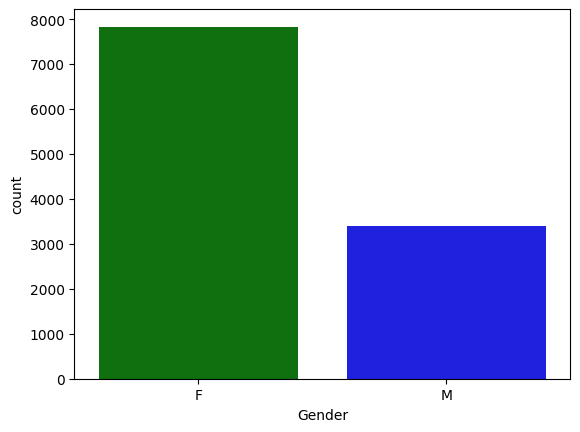

In [13]:
sns.countplot(x='Gender',data=df, hue='Gender', palette=['green', 'blue'])

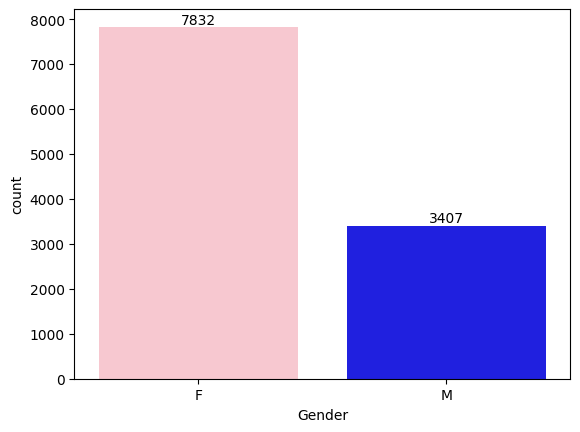

In [ ]:
ax = sns.countplot(x='Gender',data=df,  hue='Gender', palette=['pink', 'blue'])
for bars in ax.containers:
     ax.bar_label(bars)

In [15]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


([0, 1], [Text(0, 0, 'F'), Text(1, 0, 'M')])

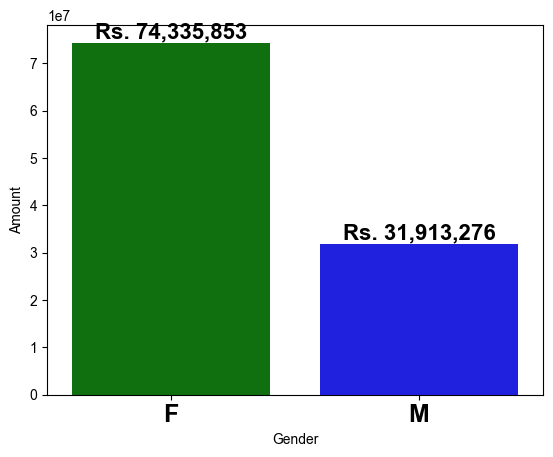

In [16]:
sal_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x='Gender', y='Amount', data=sal_gen, hue='Gender', palette=['green', 'blue'])
sns.set(rc={'figure.figsize':(8,8)}) 
plt.legend([], [], frameon=False)  
for p in ax.patches:
    ax.annotate(f"Rs. {p.get_height():,.0f}",  
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.xticks(fontsize=18, fontweight='bold')  

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

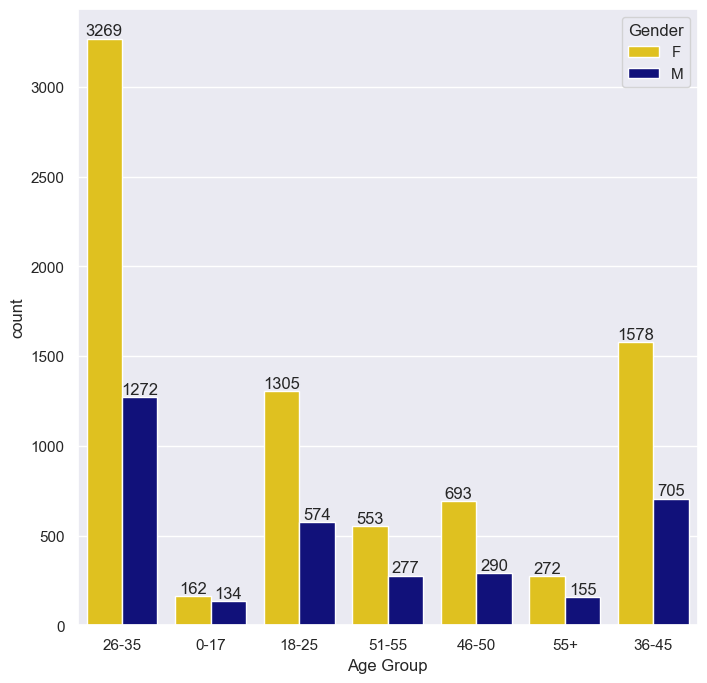

In [ ]:
ax= sns.countplot(data=df,x='Age Group',hue='Gender', palette=['gold', 'darkblue'])
for bars in ax.containers:
                      ax.bar_label(bars)

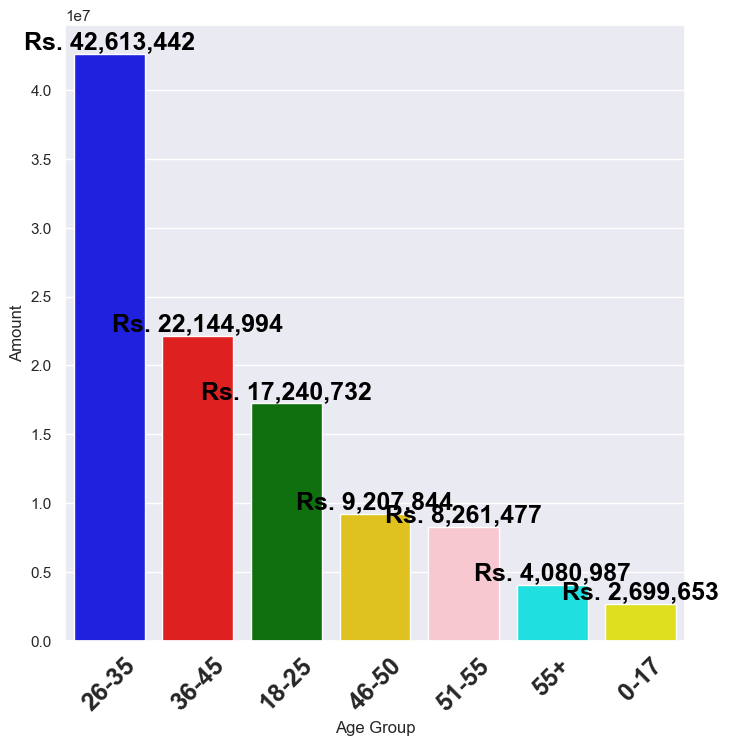

In [19]:
sale_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x='Age Group', y='Amount', data=sale_age, hue='Age Group', palette=['blue', 'red','green','gold','pink','cyan','yellow'])
sns.set(rc={'figure.figsize':(25,10)}) 
for p in ax.patches:
    ax.annotate(f"Rs. {p.get_height():,.0f}",  
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')
plt.xticks(rotation=45,fontsize=18, fontweight='bold')  
plt.legend([], [], frameon=False) 

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

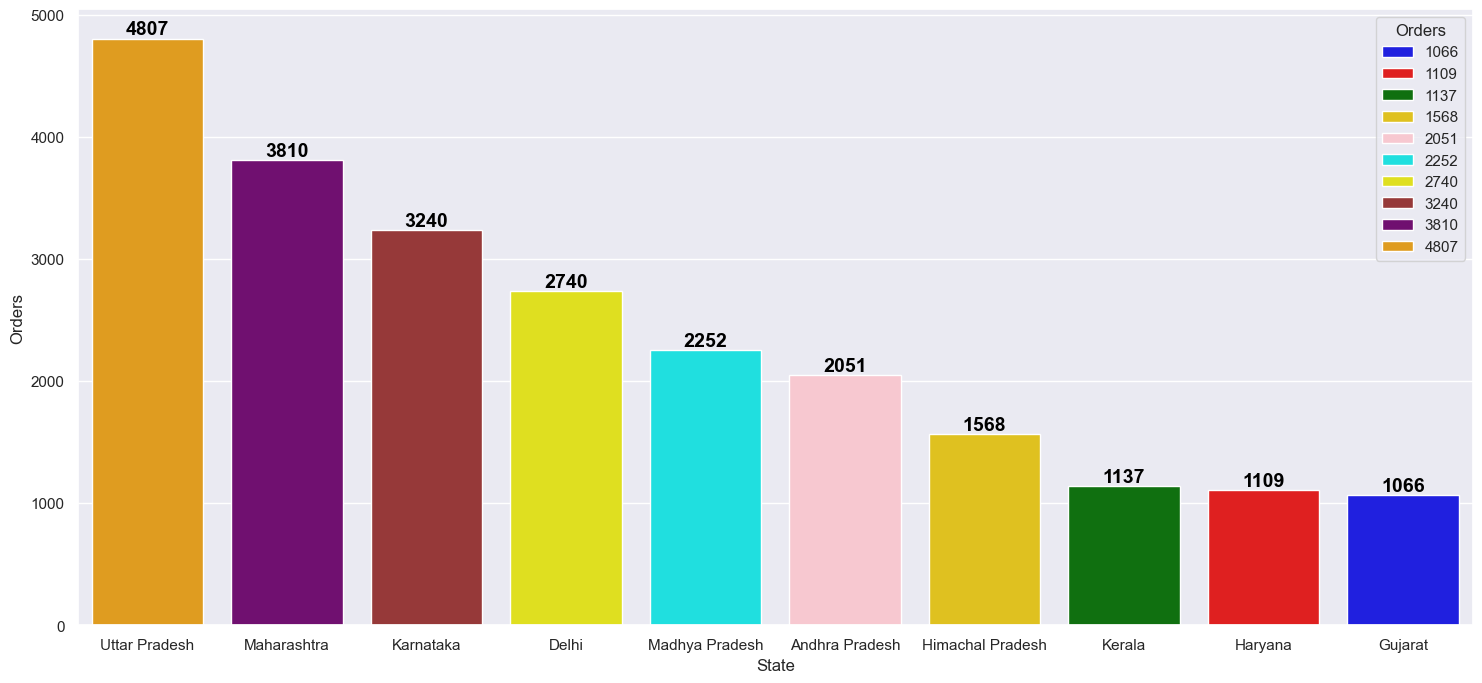

In [ ]:
sale_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,8)}) 
colour=['blue', 'red', 'green', 'gold', 'pink', 'cyan', 'yellow','brown','purple','orange']
ax = sns.barplot(x='State', y='Orders', data=sale_state, hue='Orders', palette=colour)
for ax in ax.containers:
     ax.bar_label(ax, fontsize=14, fontweight='bold', color='black')

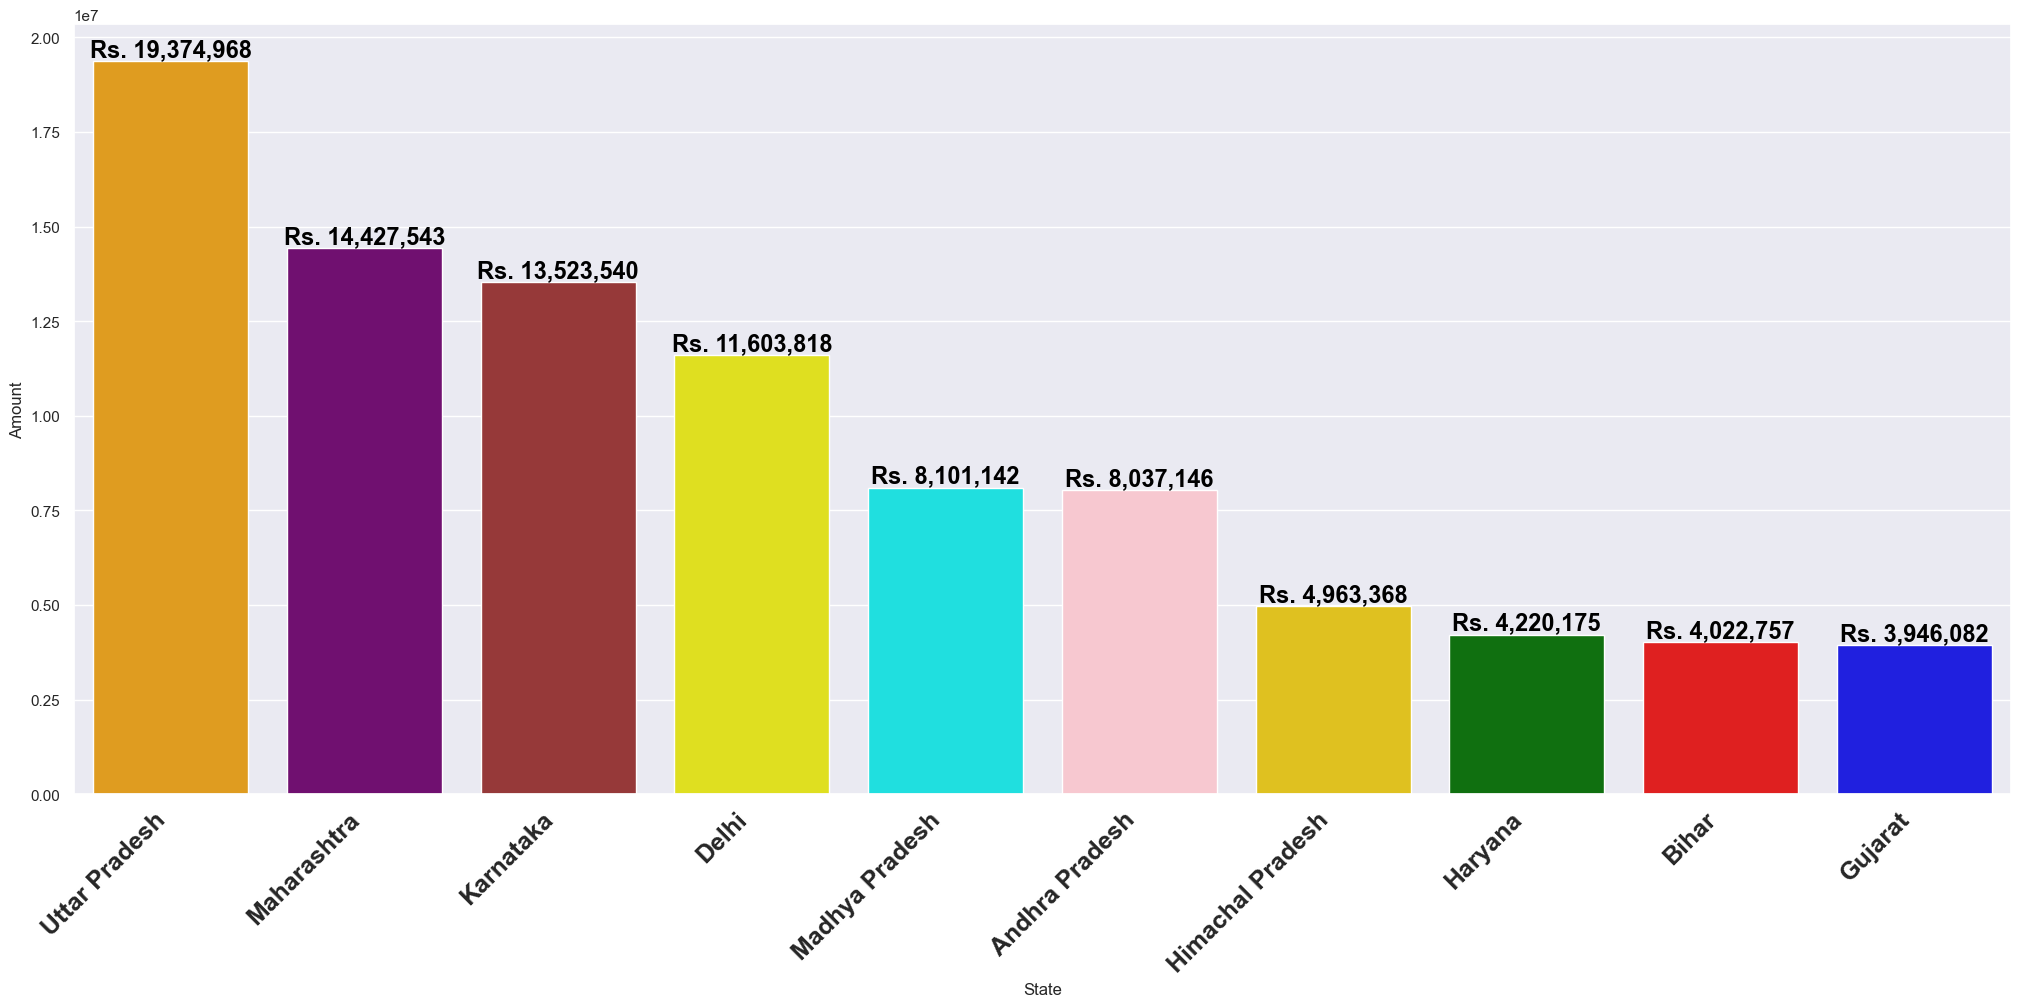

In [22]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
colour=['blue', 'red', 'green', 'gold', 'pink', 'cyan', 'yellow','brown','purple','orange']
ax = sns.barplot(data=sales_state, x='State', y='Amount', hue='Amount', palette=colour)
for p in ax.patches:
    if p.get_height() > 0:  # Avoid annotation for zero values
        ax.annotate(f"Rs. {p.get_height():,.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=17, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right',fontsize=18, fontweight='bold') 
plt.legend([], [], frameon=False)

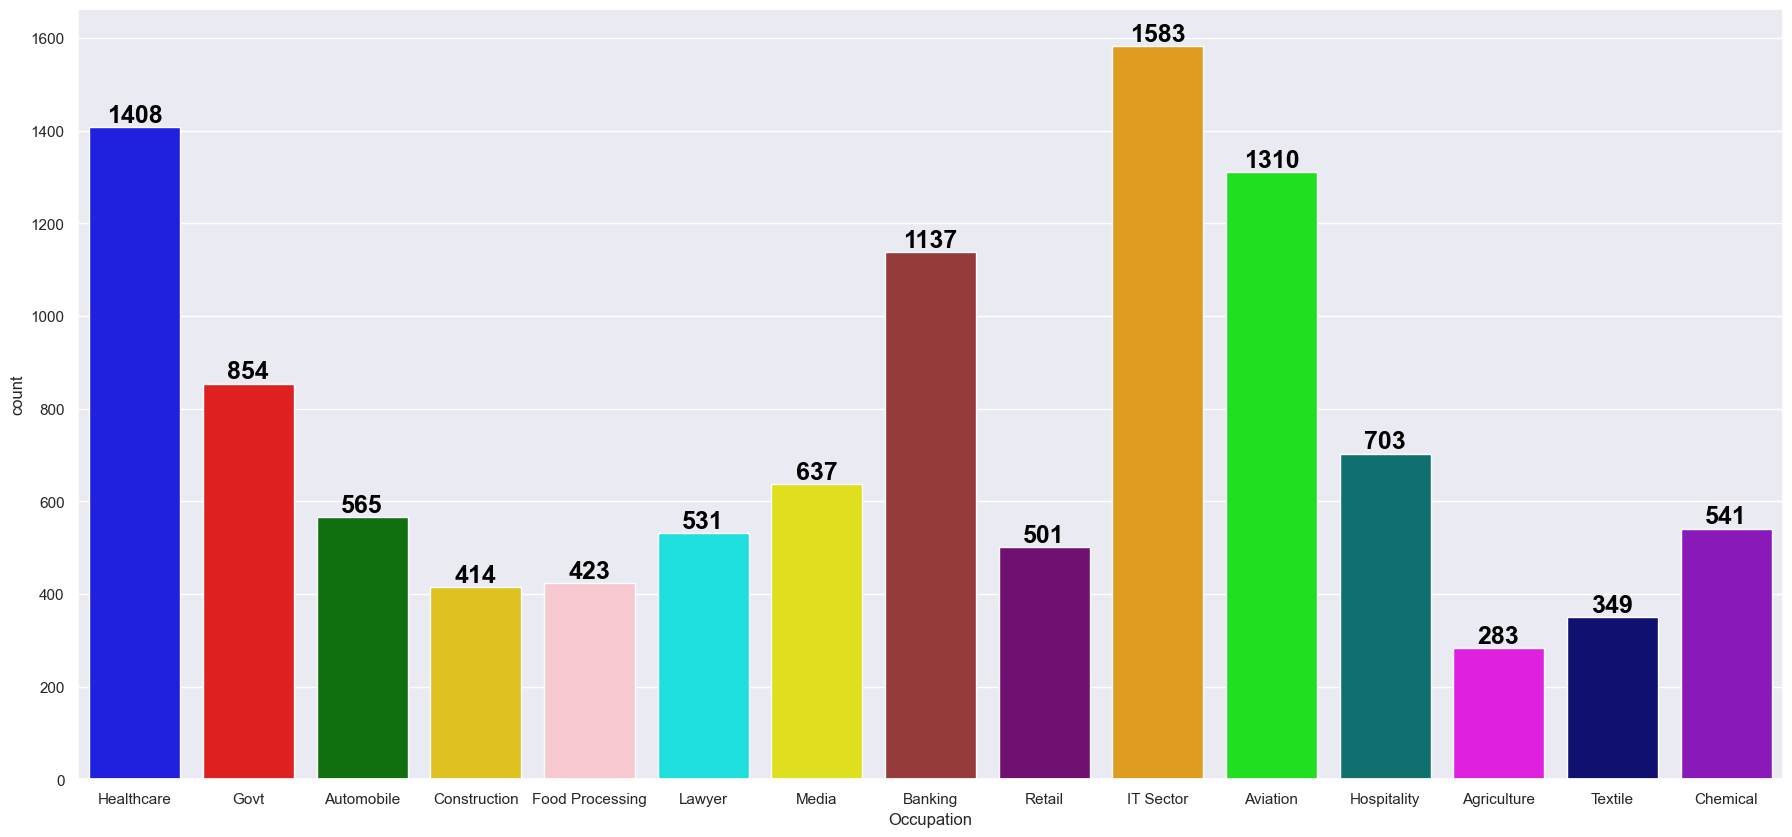

In [ ]:
sns.set(rc={'figure.figsize':(22,10)}) 
colour2 = ['blue', 'red', 'green', 'gold', 'pink', 'cyan', 'yellow', 
           'brown', 'purple', 'orange', 'lime', 'teal', 'magenta', 'navy', 'darkviolet']
ax = sns.countplot(x='Occupation',data=df,  hue='Occupation', palette=colour2)
for bars in ax.containers:
     ax.bar_label(bars, fontsize=18, fontweight='bold', color='black')

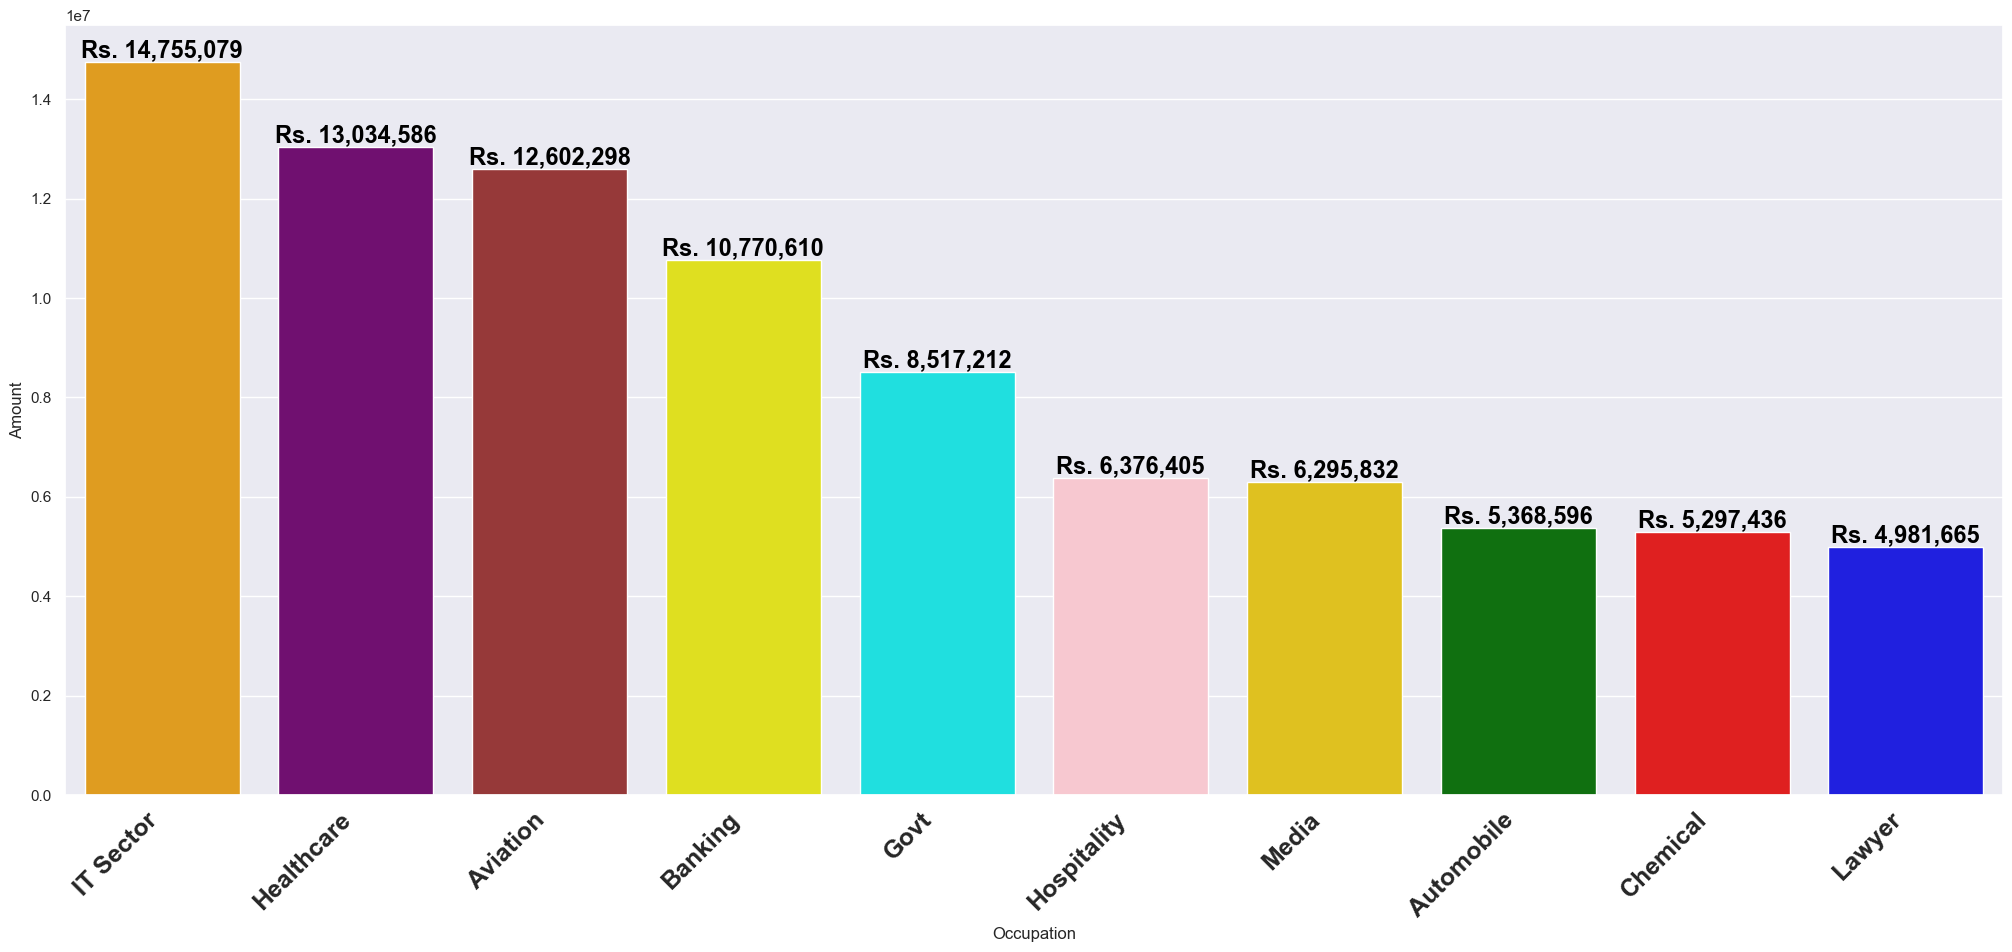

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', hue='Amount', palette=colour)
for p in ax.patches:
    if p.get_height() > 0:  # Avoid annotation for zero values
        ax.annotate(f"Rs. {p.get_height():,.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=17, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right',fontsize=18, fontweight='bold') 
plt.legend([], [], frameon=False)

In [25]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

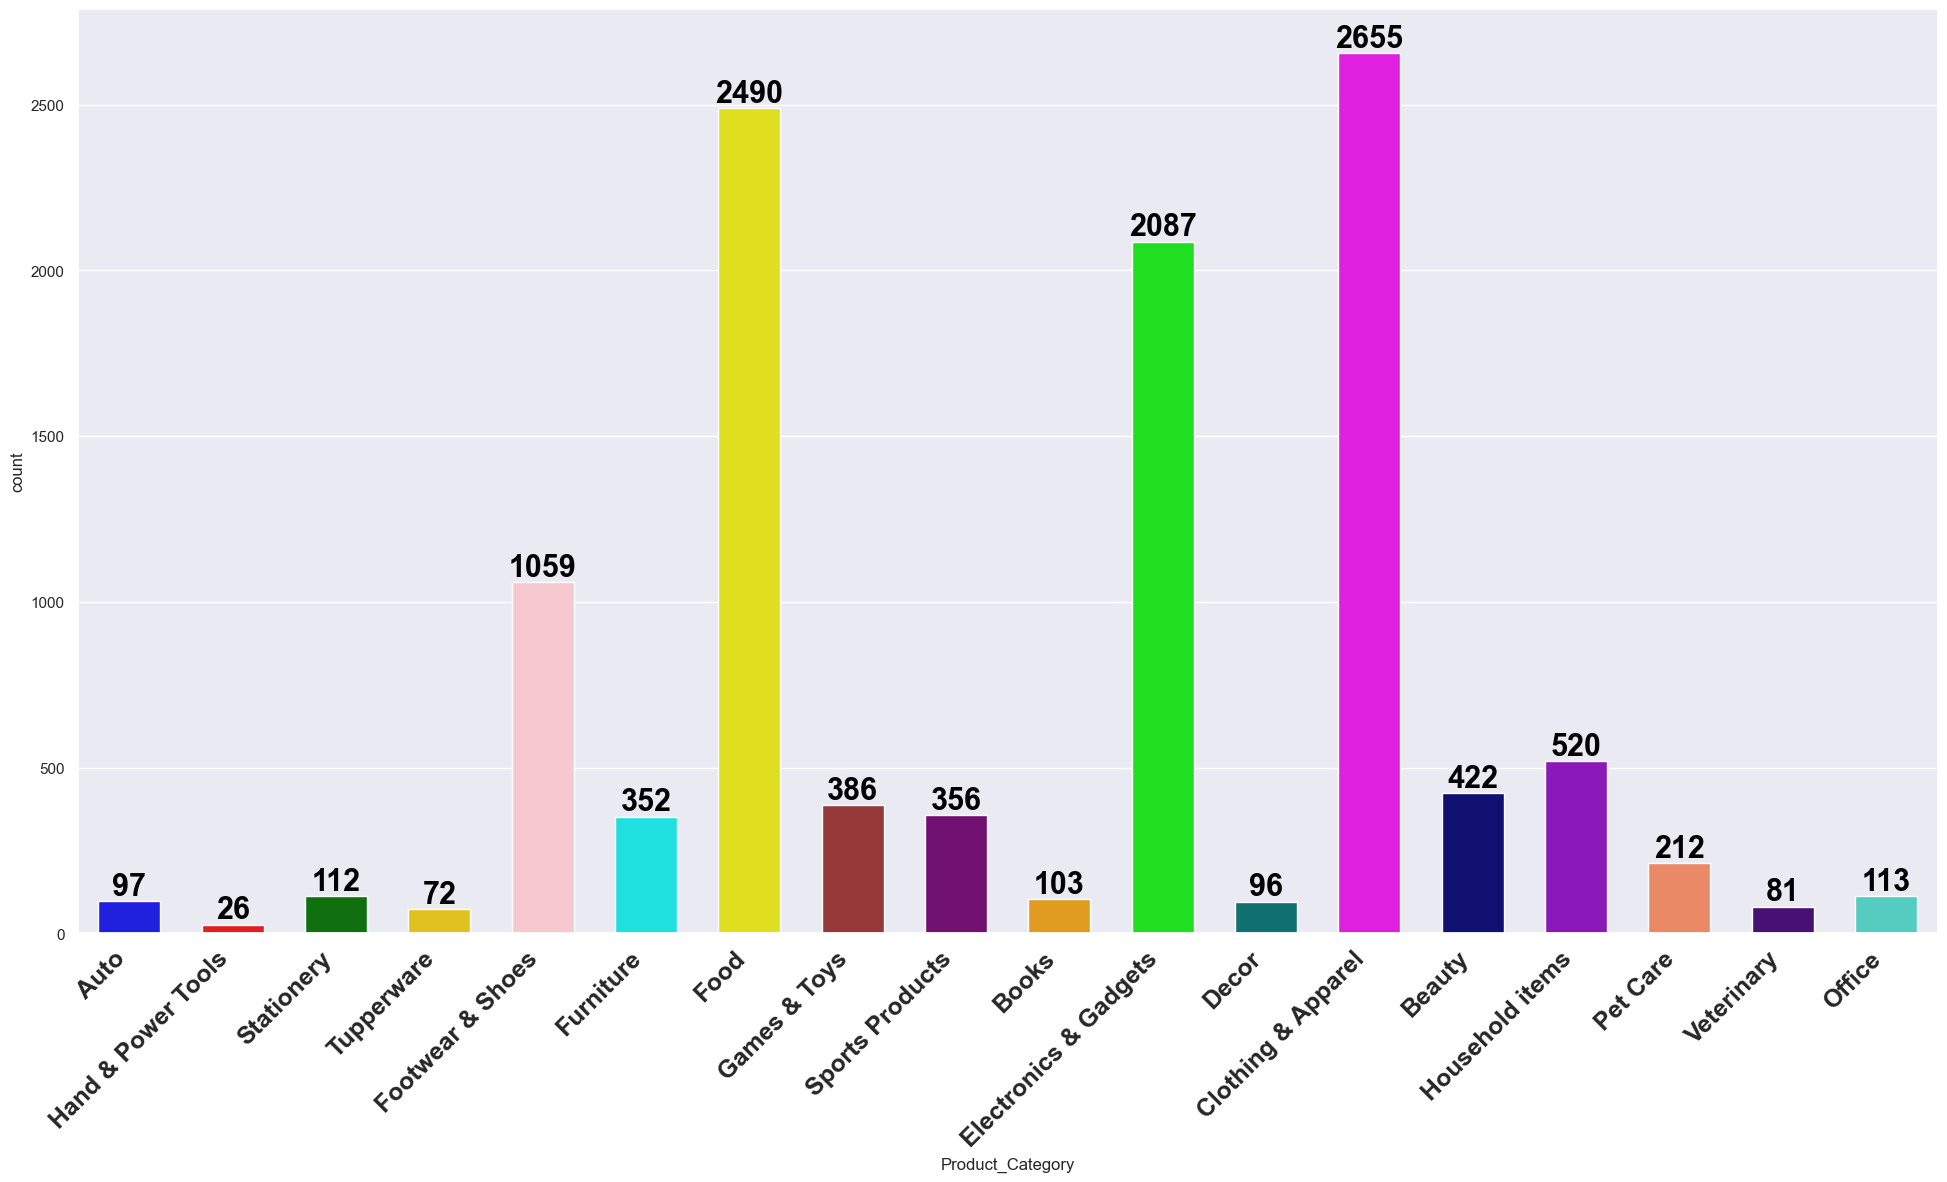

In [ ]:
sns.set(rc={'figure.figsize': (24,12)})
colour3 = ['blue', 'red', 'green', 'gold', 'pink', 'cyan', 'yellow', 
           'brown', 'purple', 'orange', 'lime', 'teal', 'magenta', 
           'navy', 'darkviolet', 'coral', 'indigo', 'turquoise']
ax = sns.countplot(x='Product_Category', data=df,hue='Product_Category',palette=colour3, width=0.6)
for bars in ax.containers:
    ax.bar_label(bars, fontsize=22, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right',fontsize=18, fontweight='bold') 
plt.legend([], [], frameon=False)

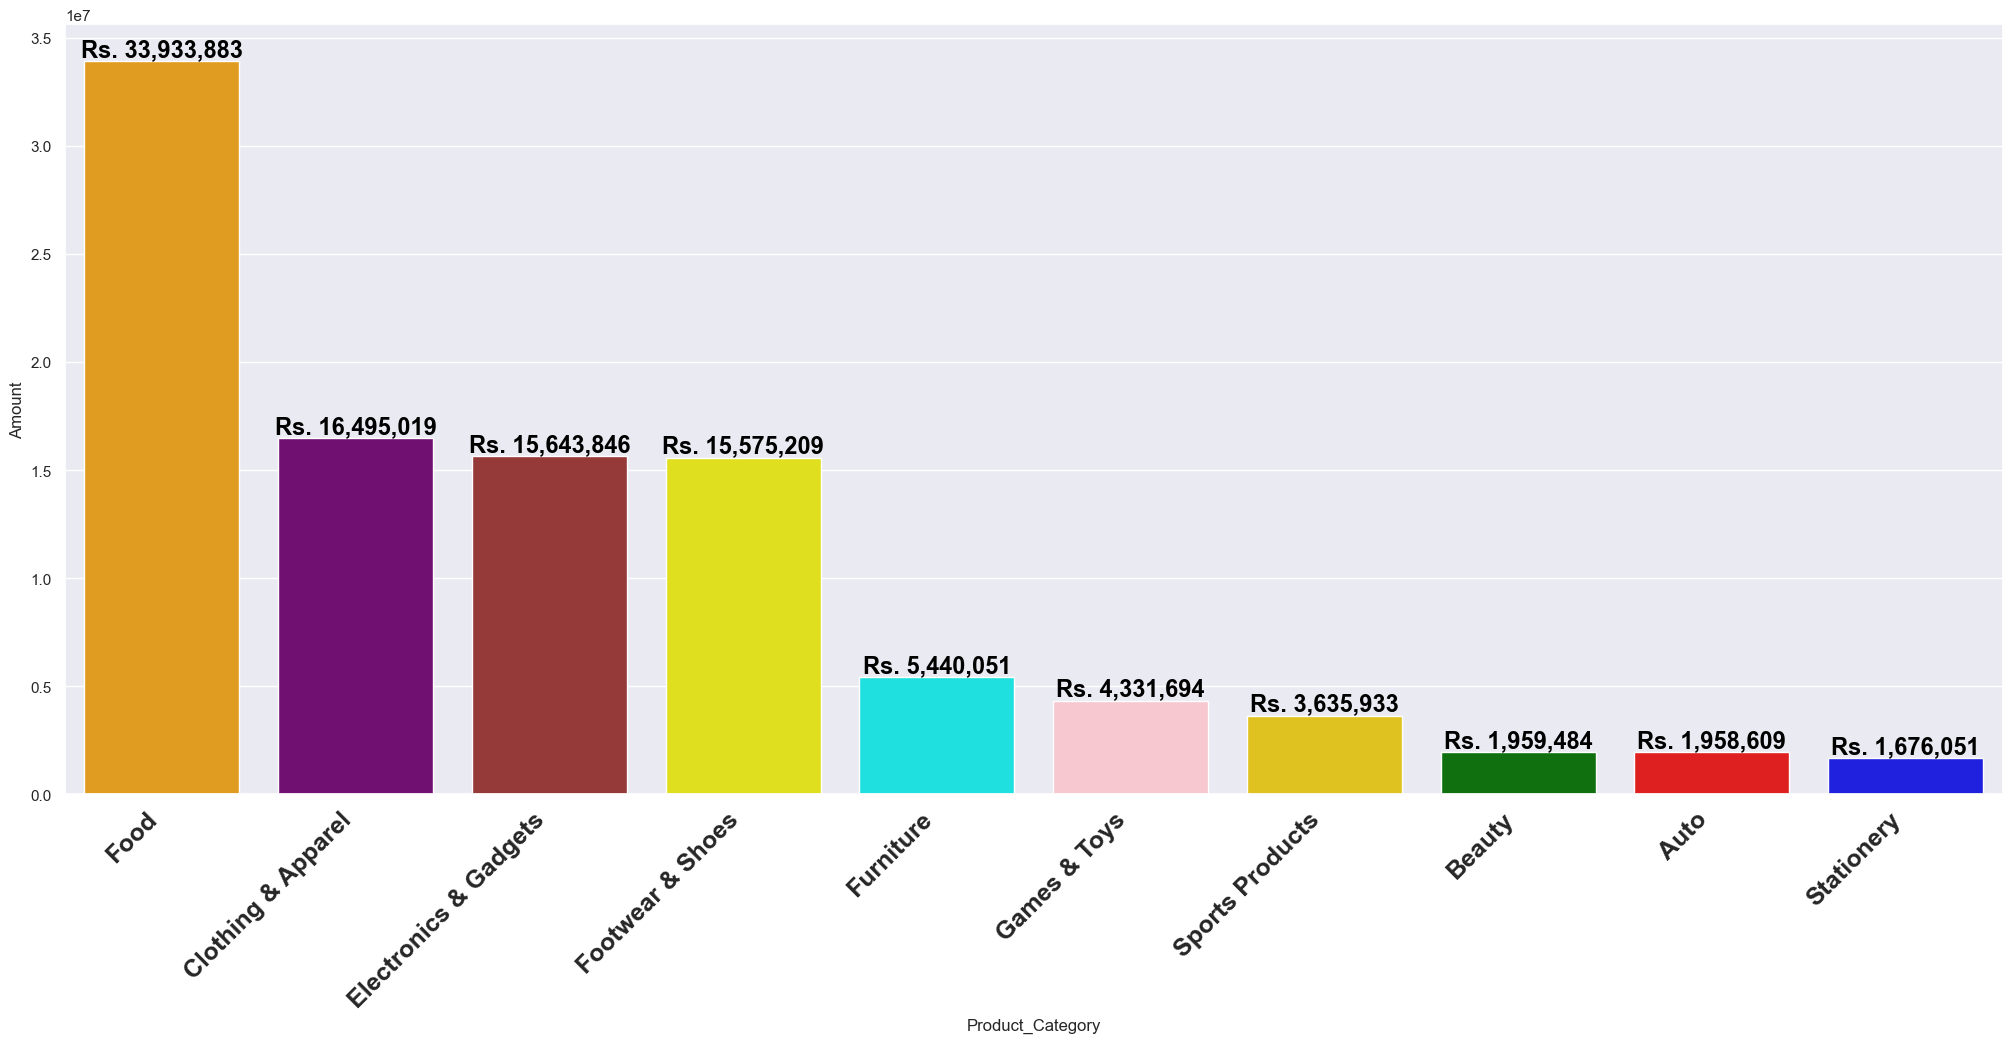

In [27]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', hue='Amount', palette=colour)
for p in ax.patches:
    if p.get_height() > 0:  # Avoid annotation for zero values
        ax.annotate(f"Rs. {p.get_height():,.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=17, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right',fontsize=18, fontweight='bold') 
plt.legend([], [], frameon=False)

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\sharm\AppData\Local\Temp\ipykernel_12260\2152454092.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(data=sales_zone, x='Zone', y='Amount', hue='Amount', palette=colour)


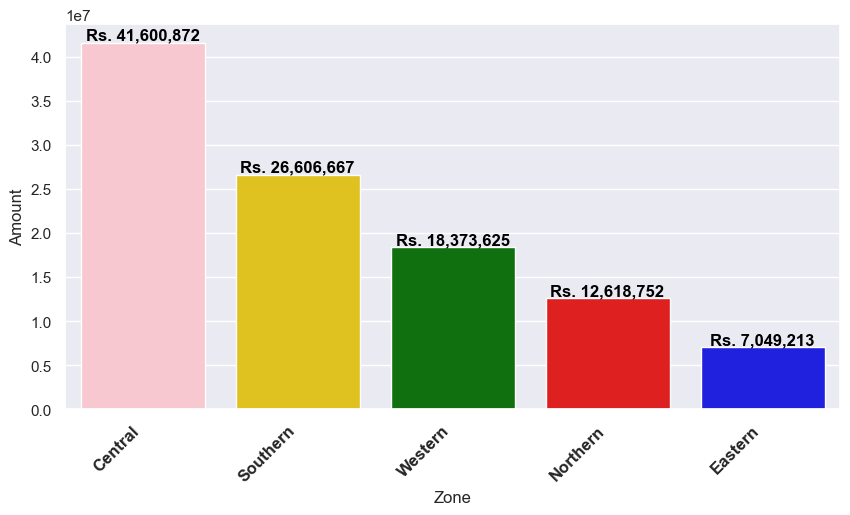

In [29]:
sales_zone = df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(data=sales_zone, x='Zone', y='Amount', hue='Amount', palette=colour)
for p in ax.patches:
    if p.get_height() > 0:  # Avoid annotation for zero values
        ax.annotate(f"Rs. {p.get_height():,.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right',fontsize=12, fontweight='bold') 
plt.legend([], [], frameon=False)

Text(0.5, 1.0, 'Sales Distribution by Zone')

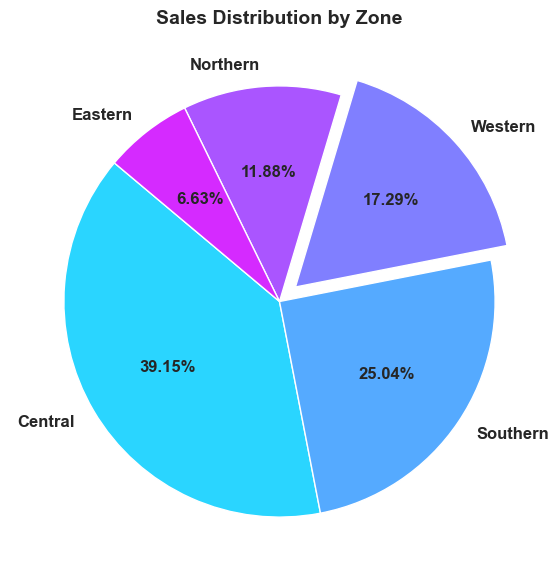

In [30]:
sales_zone = df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Pie Chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette("cool", len(sales_zone))  
ex=[0,0,0.1,0,0]
plt.pie(sales_zone['Amount'], labels=sales_zone['Zone'], autopct='%1.2f%%',explode=ex, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontweight': 'bold'})

# Title
plt.title("Sales Distribution by Zone", fontsize=14, fontweight='bold')

In [ ]:
Occupation_subcategory = (df.groupby(["State", "Product_Category"])["Amount"].sum().reset_index().sort_values(["State", "Amount"], ascending=[True, False]))
dominant_subcategory_per_state = Occupation_subcategory.drop_duplicates(subset=["State"], keep="first")


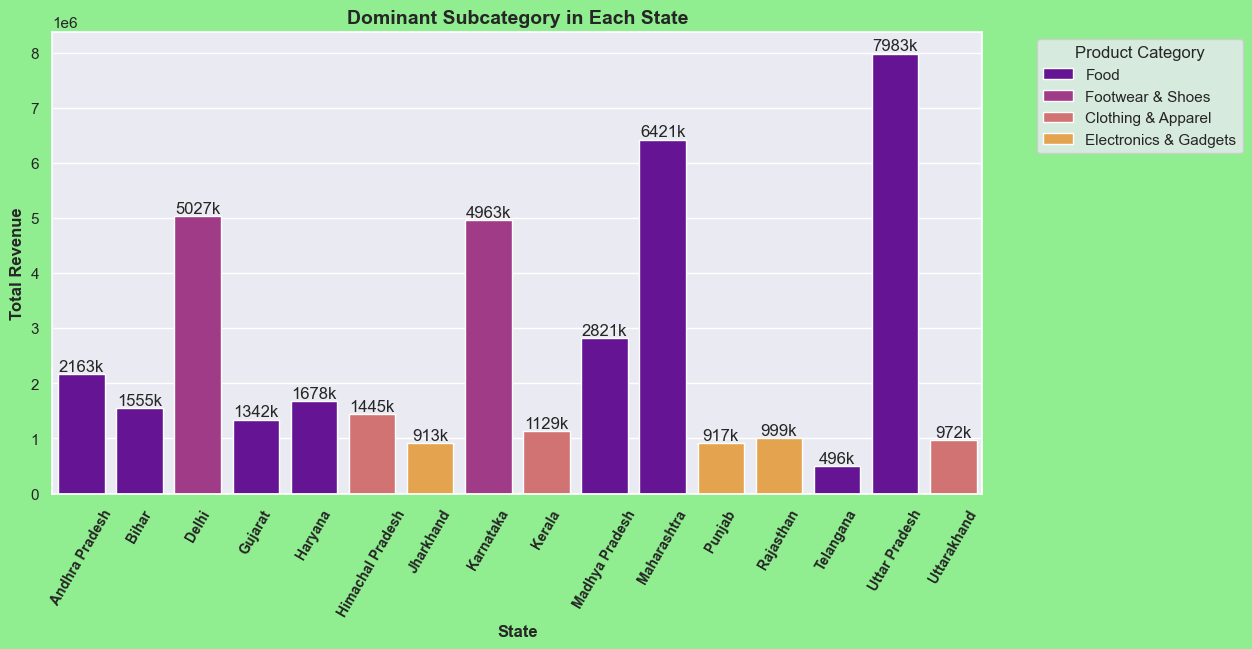

In [51]:
plt.figure(figsize=(12, 6),facecolor='lightgreen')
bars = sns.barplot(data=dominant_subcategory_per_state, x="State", y="Amount", hue="Product_Category",palette='plasma')
plt.xticks(rotation=60,fontweight='bold',fontsize=10)
plt.title("Dominant Subcategory in Each State",fontweight='bold',fontsize=14)
plt.ylabel("Total Revenue",fontweight='bold',fontsize=12)
plt.xlabel("State",fontweight='bold',fontsize=12)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
for a in bars.containers:
    bars.bar_label(a, labels=[f'{int(v.get_height() / 1e3)}k' for v in a])
plt.show()


In [69]:
category_per_occupation = (
    df.groupby(["Occupation", "Product_Category"])["Amount"]
    .sum()
    .reset_index()
    .sort_values(["Occupation", "Amount"], ascending=[True, False])
)


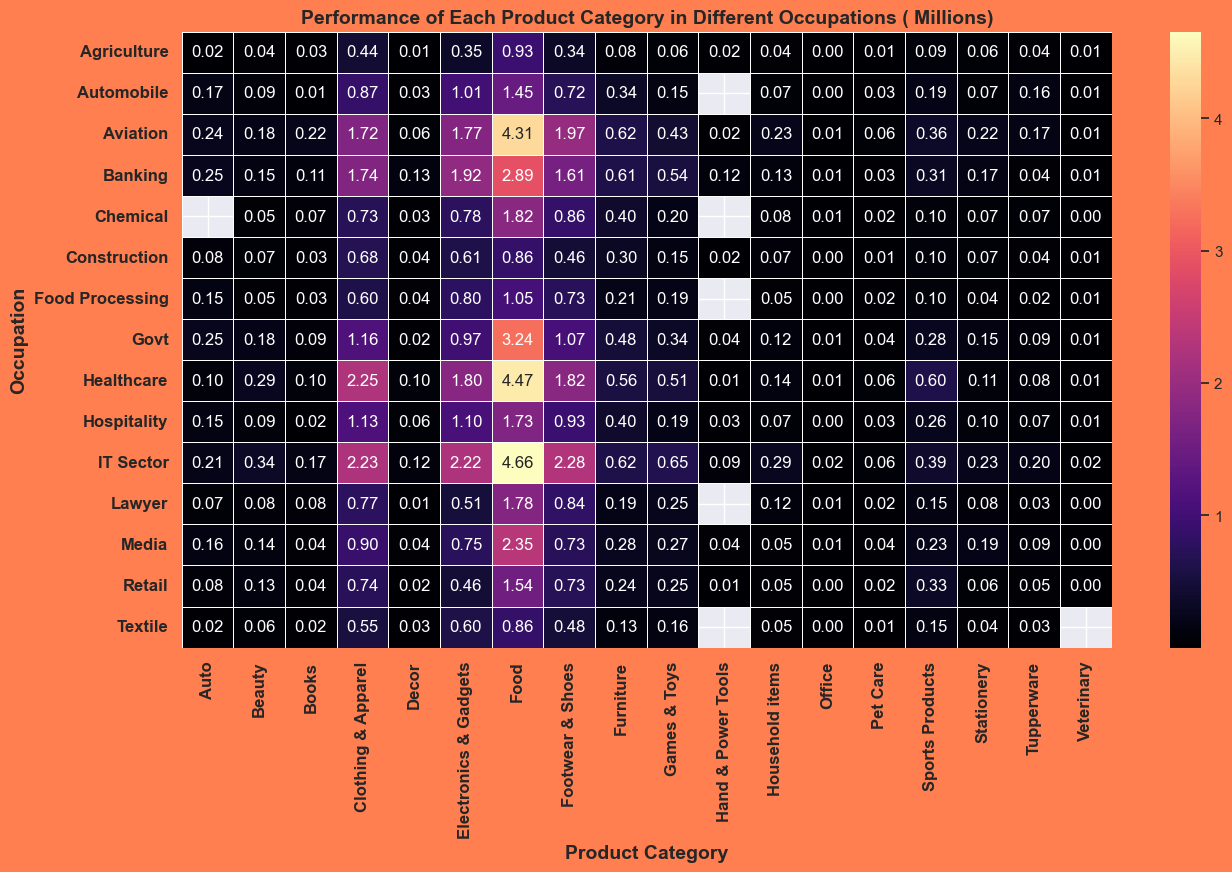

In [82]:

pivot_table = category_per_occupation.pivot(index="Occupation", columns="Product_Category", values="Amount") / 1_000_000

plt.figure(figsize=(15, 8),facecolor='coral')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="magma", linewidths=0.5)

plt.title("Performance of Each Product Category in Different Occupations ( Millions)",fontweight='bold',fontsize=14)
plt.xlabel("Product Category",fontweight='bold',fontsize=14)
plt.ylabel("Occupation",fontweight='bold',fontsize=14)
plt.xticks(rotation=90,fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)

plt.show()


# <h1 style="color:orangered;">🔥 Diwali Sales Data Analysis</h1>
<p>This analysis explores Diwali sales patterns, identifying key purchasing trends among different demographics.</p>

<h2 style="color:#0077b6;">🔷 Key Findings</h2>

<h3 style="color:#005f73;">🔹 1️⃣ Gender-Based Insights</h3>
<ul>
    <li>A majority of buyers are <b>female</b>, indicating a higher shopping engagement.</li>
    <li><b>Total purchase amount by females</b> is significantly higher than males, suggesting greater purchasing power.</li>
</ul>

<h3 style="color:#005f73;">🔹 2️⃣ Age Group Trends</h3>
<ul>
    <li>Most buyers belong to the <b>26-35 age group</b>, particularly women.</li>
    <li>Younger age groups show moderate purchasing activity, while older groups contribute less to overall sales.</li>
</ul>

<h3 style="color:#005f73;">🔹 3️⃣ State-Wise Sales Performance</h3>
<ul>
    <li><b>Uttar Pradesh records the highest number of orders</b>, followed by Maharashtra and Karnataka.</li>
    <li>States with higher urban populations tend to have greater purchase volumes.</li>
</ul>

<h3 style="color:#005f73;">🔹 4️⃣ Work Profile & Spending Capacity</h3>
<ul>
    <li><b>IT professionals have the highest purchasing power</b>, likely due to stable incomes and Diwali bonuses.</li>
    <li>Corporate professionals and business owners also show high spending trends.</li>
    <li><b>IT professionals also like to spend on food and fashion in almost all the states</b>, likely due to good income.</li>
</ul>

<h3 style="color:#005f73;">🔹 5️⃣ Popular Product Categories</h3>
<ul>
    <li><b>Clothing & Food categories dominate sales</b>, indicating their popularity as Diwali gifts.</li>
    <li><b>The Food category generates the maximum revenue</b>, likely due to traditional festival purchases.</li>
    <li><b>The Food category is very popular in the people working in it sector</b>, likely due to migration.</li>
</ul>
<h3 style="color:#005f73;">🔹 5️⃣ Popular Zone Categories </h3>
<ul>
    <li><b>Central Zone is Doninating in Sales</b>, indicating a stronghold for businesses.</li>
    <li> likely due to traditional and cultural location for festival purchases.</li>
</ul>
<hr>

<h2 style="color:orangered;">📌 Conclusion</h2>
<ul>
    <li>The most valuable customers are <b>females aged 26-35, working in the IT sector, particularly from Uttar Pradesh.</b></li>
    <li>Clothing and food products should be <b>marketed aggressively</b> for Diwali campaigns.</li>
    <li>E-commerce platforms can <b>tailor promotional offers</b> based on high-value customer segments.</li>
    <li>E-commerce platforms also should target <b>IT sector </b>in all states because of high-value customer segments.</li>
</ul>

